In [2]:
%pip install pandas


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 645.7 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/11.0 MB 699.0 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/11.0 MB 699.0 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.0 MB 699.0 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.0 MB 699.0 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.0

In [3]:
%pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.5 MB ? eta -:--:--
    --------------------------------------- 0.5/38.5 MB 837.5 kB/s eta 0:00:46
    --------------------------------------- 0.5/38.5 MB 837.5 kB/s eta 0:00:46
    --------------------------------------- 0.8/38.5 MB 633.2 kB/s eta 0:01:00
    --------------------------------------- 0.8/38.5 MB 633.2 kB/s eta 0:01:00
   - -------------------------------------- 1.0/38.5 MB 679.7 kB/s eta 0:00:56
   - -------------------------------------- 1.3/38.5 MB 713.8 kB/s eta 0:00:53
   - -------------------------------------- 1.3/38.5 MB 713.8 kB/s eta 0:00:53
   - -------------------------------------- 1.6/38.5 MB 749.0 kB/s eta 0:00:50
   - -------------------------------------- 1.8/38.5 MB 792.4 kB/s eta 0:00:47
   - -------------------------------------- 1.8/38.5 MB 792.4 kB/s eta 0:00:47


IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import pickle
import pandas as pd 
import streamlit as st
import numpy as np

LOADING THE DATASET

In [2]:
path = r"H:\singp_flat"
final_df = pd.concat(
           [pd.read_csv(os.path.join(path, f)) for f in os.listdir(path) if f.endswith(".csv")],
           ignore_index=True)
final_df = final_df.fillna(0)  

In [3]:
final_df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0


In [4]:
final_df.shape

(961447, 11)

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961447 entries, 0 to 961446
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                961447 non-null  object 
 1   town                 961447 non-null  object 
 2   flat_type            961447 non-null  object 
 3   block                961447 non-null  object 
 4   street_name          961447 non-null  object 
 5   storey_range         961447 non-null  object 
 6   floor_area_sqm       961447 non-null  float64
 7   flat_model           961447 non-null  object 
 8   lease_commence_date  961447 non-null  int64  
 9   resale_price         961447 non-null  float64
 10  remaining_lease      961447 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 80.7+ MB


 FEATURE ENGINEERING 

In [6]:
# Type casting of feature "month": object to date time 
final_df['month'] = pd.to_datetime(final_df['month'], format='%Y-%m')
final_df['year'] = final_df['month'].dt.year
final_df['month_num'] = final_df['month'].dt.month

In [7]:
final_df[['min_storey_range', 'max_storey_range']] = final_df['storey_range'].str.extract(r'(\d+)\s*TO\s*(\d+)')

DATA PREPROCESSING

In [8]:
final_df['min_storey_range'] = final_df['min_storey_range'].astype(int)
final_df['max_storey_range'] = final_df['max_storey_range'].astype(int)

In [9]:
final_df['flat_type'] = (final_df['flat_type'].str.replace(r"\s*ROOM\s*", "", regex=True)
                                            .str.replace("-", " ", regex = False)      
                                             .str.upper()                             
                                             .str.strip() )
final_df['flat_type'] = final_df['flat_type'].astype(str)

In [10]:
final_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [11]:
final_df['flat_model'] = final_df['flat_model'].str.upper().str.strip()

In [12]:
final_df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [13]:
final_df['flat_type'].unique() 

array(['1', '3', '4', '5', '2', 'EXECUTIVE', 'MULTI GENERATION'],
      dtype=object)

In [14]:
final_df['block'].unique()

array(['309', '216', '211', ..., '478A', '479B', '479C'],
      shape=(2746,), dtype=object)

In [15]:
final_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [16]:
def parse_remaining_lease(x):
    try:
        x_str = str(x).lower().strip()

        if x_str.isdigit():
            return float(x_str)
        
        years, months = 0,0

        if "year" in x_str:
            years_part = x_str.split("year")[0].strip()
            if years_part.replace(" ", "").isdigit():
                years = int(years_part)

        if "month" in x_str:
            months_part = ( x_str.split("month")[0].split()[-1].strip() )
            if months_part.isdigit():
                months = int(months_part)
    
        return years + months/12   
    except Exception:
        return np.nan          

In [17]:
final_df['remaining_lease_years'] = (final_df['remaining_lease'].apply(parse_remaining_lease).astype(float))


In [18]:
final_df.isna().sum()

month                    0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
remaining_lease          0
year                     0
month_num                0
min_storey_range         0
max_storey_range         0
remaining_lease_years    0
dtype: int64

In [19]:
final_df[final_df.duplicated()].count()

month                    1915
town                     1915
flat_type                1915
block                    1915
street_name              1915
storey_range             1915
floor_area_sqm           1915
flat_model               1915
lease_commence_date      1915
resale_price             1915
remaining_lease          1915
year                     1915
month_num                1915
min_storey_range         1915
max_storey_range         1915
remaining_lease_years    1915
dtype: int64

In [20]:
final_df.drop_duplicates(inplace=True,ignore_index=True)

In [21]:
final_df.drop(['month','storey_range','remaining_lease','block'], axis = 1, inplace= True)

In [22]:
final_df.dtypes   

town                      object
flat_type                 object
street_name               object
floor_area_sqm           float64
flat_model                object
lease_commence_date        int64
resale_price             float64
year                       int32
month_num                  int32
min_storey_range           int64
max_storey_range           int64
remaining_lease_years    float64
dtype: object

In [23]:
final_df.shape

(959532, 12)

DATA ANALYSIS

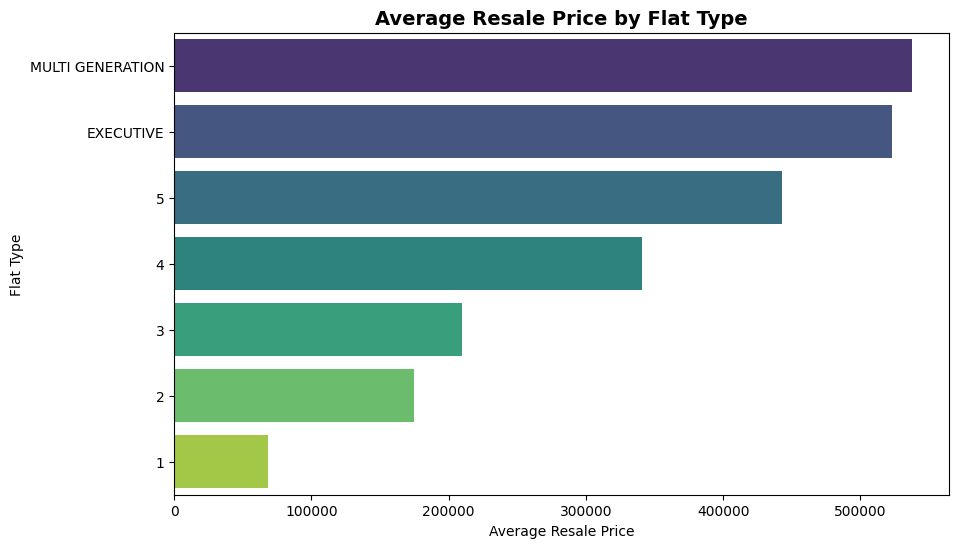

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Group by flat type and calculate mean resale price
avg_price_by_flat = final_df.groupby("flat_type")["resale_price"].mean().reset_index().sort_values("resale_price", ascending=True)

# Sort by average price 
avg_price_by_flat = avg_price_by_flat.sort_values("resale_price", ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price_by_flat, y="flat_type", x="resale_price", hue='flat_type', 
            dodge= False, legend = False,  palette="viridis")

plt.title("Average Resale Price by Flat Type", fontsize=14, fontweight="bold")
plt.xlabel("Average Resale Price")
plt.ylabel("Flat Type")
plt.show()

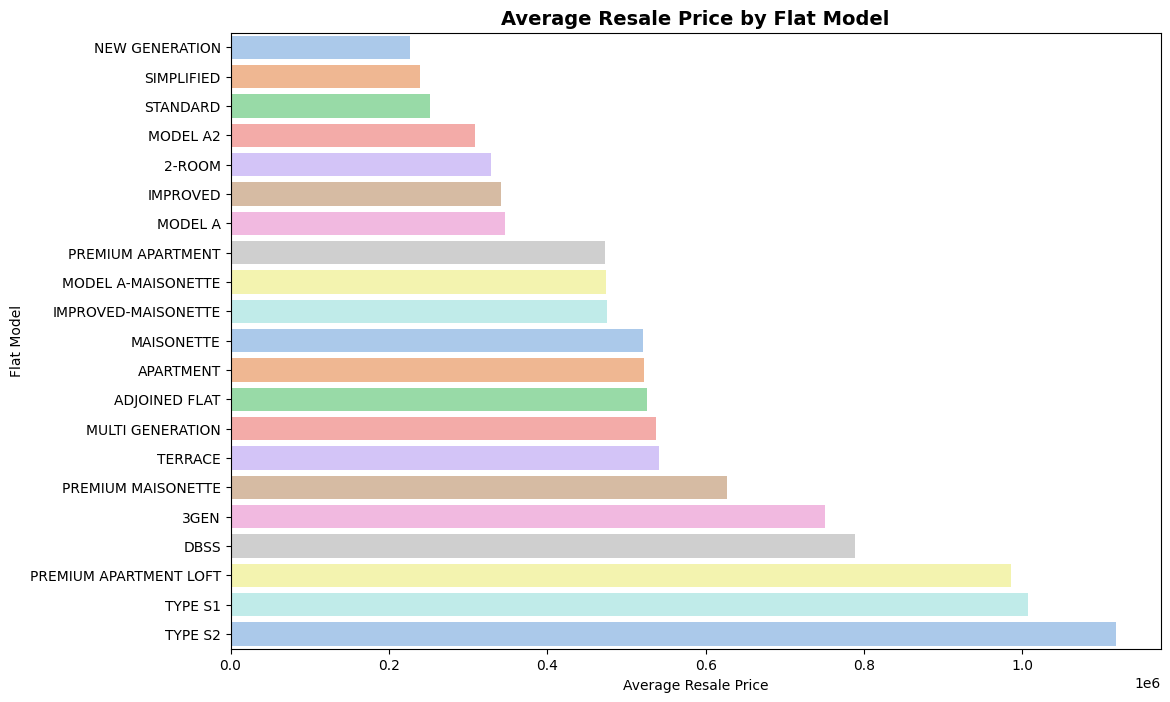

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by flat model and calculate mean resale price
avg_price_by_model = (final_df.groupby("flat_model")["resale_price"].mean().reset_index()
                          .sort_values("resale_price", ascending=True))
# Horizontal bar plot
plt.figure(figsize=(12,8))
sns.barplot(data=avg_price_by_model,y="flat_model",x="resale_price",hue="flat_model",      
                               dodge=False,legend=False,palette="pastel")

plt.title("Average Resale Price by Flat Model", fontsize=14, fontweight="bold")
plt.xlabel("Average Resale Price")
plt.ylabel("Flat Model")
plt.show()

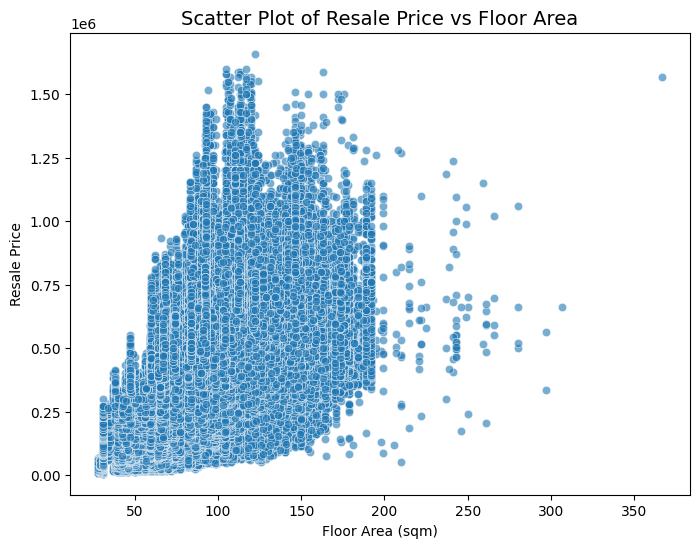

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot using seaborn (cleaner style)
plt.figure(figsize=(8,6))
sns.scatterplot(x="floor_area_sqm", y="resale_price", data=final_df, alpha=0.6)

plt.title("Scatter Plot of Resale Price vs Floor Area", fontsize=14)
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price")
plt.show()

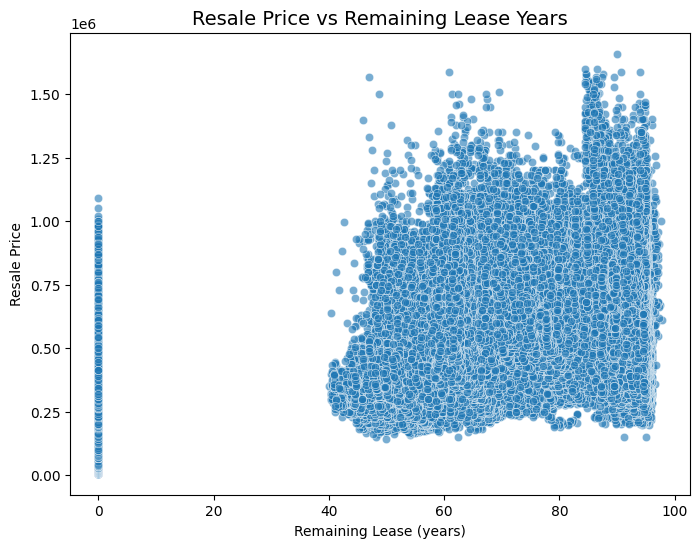

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x="remaining_lease_years", y="resale_price", data=final_df, alpha = 0.6)
plt.title("Resale Price vs Remaining Lease Years", fontsize=14)
plt.xlabel("Remaining Lease (years)")
plt.ylabel("Resale Price")
plt.show()

In [28]:
num_columns = final_df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
print(num_columns)

['floor_area_sqm', 'lease_commence_date', 'resale_price', 'year', 'month_num', 'min_storey_range', 'max_storey_range', 'remaining_lease_years']


In [29]:
from scipy.stats import skew
skew_bt = final_df[num_columns].skew()
skew_bt

floor_area_sqm           0.363362
lease_commence_date      0.680325
resale_price             1.023180
year                     0.282776
month_num               -0.031217
min_storey_range         1.378380
max_storey_range         1.378949
remaining_lease_years    1.225526
dtype: float64

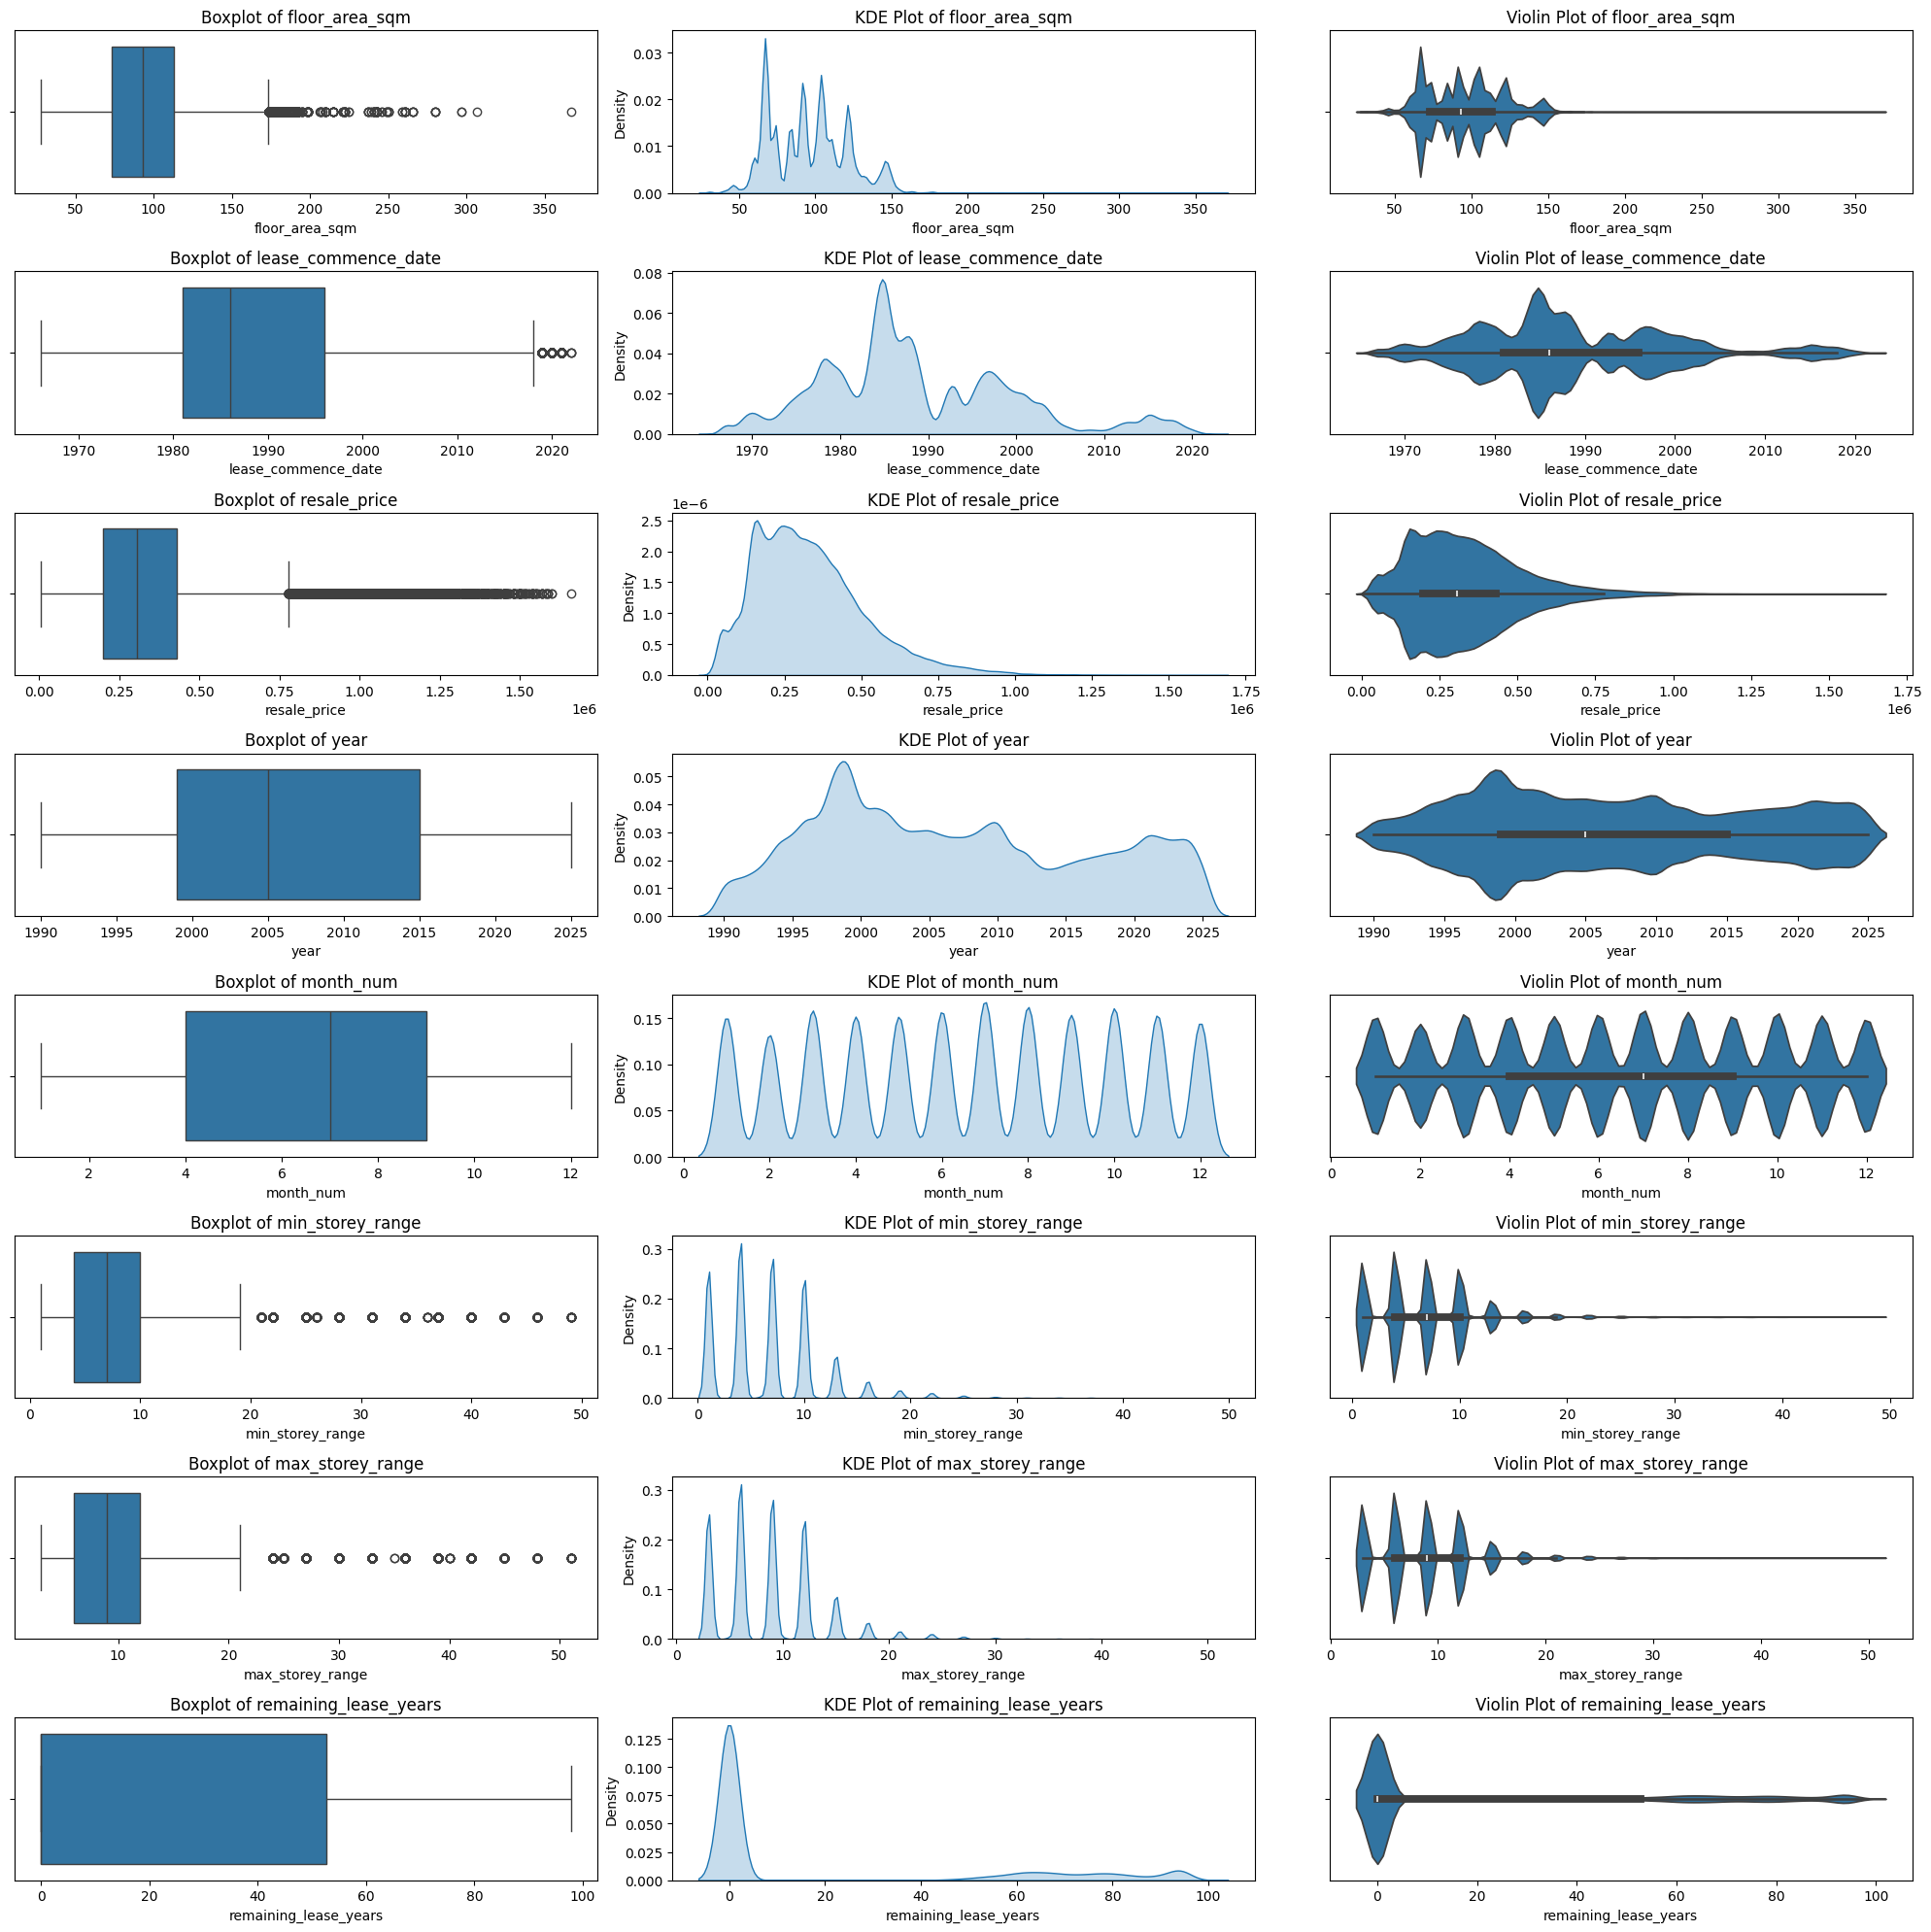

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(8, 3, figsize=(20, 20))
for i,col in enumerate(num_columns):
    sns.boxplot(x=final_df[col], ax=axes[i, 0])
    sns.kdeplot(x= final_df[col], ax=axes[i, 1], fill=True)
    sns.violinplot(x = final_df[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()

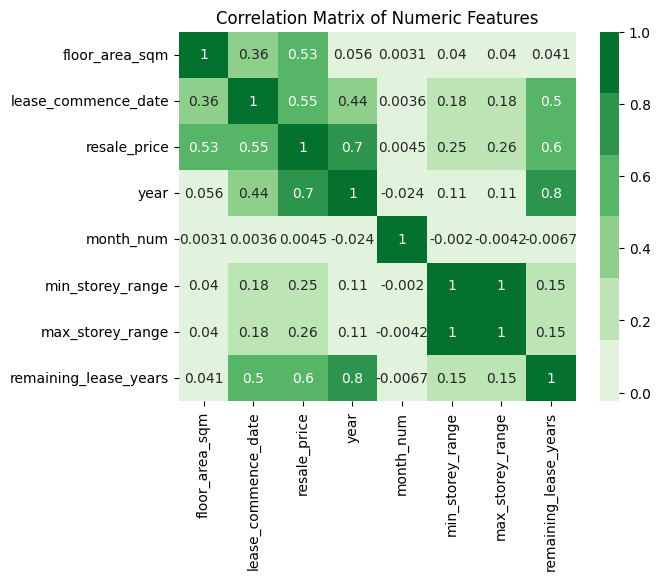

In [31]:
correlation_matrix = final_df[num_columns].corr()
colormap = sns.color_palette("Greens")
sns.heatmap(correlation_matrix, annot=True, cmap = colormap)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [32]:
final_df.tail(2) 

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,month_num,min_storey_range,max_storey_range,remaining_lease_years
959530,YISHUN,MULTI GENERATION,YISHUN ST 61,147.0,MULTI GENERATION,1987,945000.0,2025,5,4,6,61.5
959531,YISHUN,MULTI GENERATION,YISHUN ST 61,171.0,MULTI GENERATION,1987,1095000.0,2025,7,1,3,61.5


In [33]:
catg_columns = final_df.select_dtypes(include=['object']).columns.tolist()
catg_columns

['town', 'flat_type', 'street_name', 'flat_model']

ENCODING

In [34]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

for col in catg_columns:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col].astype(str))  
    encoders[col] = le 
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [35]:
df_reg = final_df.copy()

In [36]:
X = df_reg.drop(['resale_price'], axis = 1)
X.dtypes

town                       int64
flat_type                  int64
street_name                int64
floor_area_sqm           float64
flat_model                 int64
lease_commence_date        int64
year                       int32
month_num                  int32
min_storey_range           int64
max_storey_range           int64
remaining_lease_years    float64
dtype: object

MODELEVALUATION_REGRESSION (PREDICTING RESALE_PRICE)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [38]:
def evaluate_model(df, model):
    X = df.drop(columns=['resale_price'], axis = 1)
    y = df['resale_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {
        "Model": model.__class__.__name__,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
           }
    return model, metrics

In [39]:
model_one, metrics = evaluate_model(df_reg, DecisionTreeRegressor())
print(metrics)

{'Model': 'DecisionTreeRegressor', 'R2': 0.9703201999336706, 'RMSE': np.float64(31241.298321820334), 'MAE': 20256.092545297033}


In [40]:
model_two, metrics = evaluate_model(df_reg, RandomForestRegressor(n_estimators=100, max_depth= 15, 
                                                max_features = "sqrt", n_jobs= -1, random_state=42))
print(metrics)

{'Model': 'RandomForestRegressor', 'R2': 0.9529138252737951, 'RMSE': np.float64(39350.05043535134), 'MAE': 26748.29985997708}


In [41]:
from joblib import dump, load
dump(model_two, "modelrf.joblib")

['modelrf.joblib']

In [42]:
model_three, metrics = evaluate_model(df_reg, LinearRegression())
print(metrics)

{'Model': 'LinearRegression', 'R2': 0.7687245732628659, 'RMSE': np.float64(87209.40709488037), 'MAE': 64096.55052523598}


In [43]:
model_four, metrics = evaluate_model(df_reg, XGBRegressor(random_state = 42))
print(metrics)

{'Model': 'XGBRegressor', 'R2': 0.9791026973024549, 'RMSE': np.float64(26214.628359172813), 'MAE': 18326.901821326057}


Since XBG Regressor has a max R2 score and low 'RMSE and MAE' values, it has been chosen as the best performing model and thereby it is pickled.

In [44]:
with open("modelxgb.pkl", "wb") as f:
    pickle.dump(model_four, f)

In [45]:
X = df_reg.drop(columns=['resale_price'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)

In [36]:
models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    XGBRegressor(random_state=42)
]

results = []

for m in models:
    res = evaluate_model(df_reg, m)  
    results.append(res)
results_df = pd.DataFrame(results)
print(results_df)

                   Model        R2          RMSE           MAE
0  DecisionTreeRegressor  0.970307  31248.057160  20267.100894
1  RandomForestRegressor  0.983627  23204.230539  15447.422896
2       LinearRegression  0.768725  87209.407095  64096.550525
3           XGBRegressor  0.979103  26214.628359  18326.901821


In [ ]:
import pickle 
best_row = results_df.loc[results_df["R2"].idxmax()]
best_model_name = best_row["Model"]

X = df_reg.drop(columns=["resale_price"])
y = df_reg["resale_price"]

model_mapping = {
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "LinearRegression": LinearRegression(),
    "XGBRegressor": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
}

best_model = model_mapping[best_model_name]
best_model.fit(X, y)



MemoryError: could not allocate 134217728 bytes

In [45]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

NameError: name 'best_model' is not defined

In [ ]:
final_df['year'].unique() # 

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2013, 2014, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025], dtype=int32)

In [ ]:
final_df['month_num'].unique() # skewness outliers boxplot (numeric), IQR(*) scatter plot

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [10]:
final_df['remaining_lease'].unique()

array([0, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94,
       71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57,
       93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48,
       '61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
    

In [9]:
final_df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [43]:
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.1 MB/s eta 0:00:51
    --------------------------------------- 0.8/56.8 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 1.3/56.8 MB 972.7 kB/s eta 0:00:58
   - -------------------------------------- 1.6/56.8 MB 1.0 MB/s eta 0:00:55
   - -------------------------------------- 1.6/56.8 MB 1.0 MB/s eta 0:00:55
   - -------------------------------------- 1.8/56.8 MB 986.7 kB/s eta 0:00:56
   - -------------------------------------- 2.1/56.8 MB 1.0 MB/s eta 0:00:55
   - ------------------

In [40]:
%pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.7 MB 958.5 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.7 MB 958.5 kB/s eta 0:00:09
   ---- ----------------------------------- 1.0/8.7 MB 948.7 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.7 MB 958.5 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB 958.5 kB/s eta 0:00:08
   ------- -------------------------------- 1.6/8.7 MB 873.8 kB/s eta 0:00:09
   -------- ------------------------------- 1.8/8.7 MB 860.0 kB/s eta 0:00:09
   --------- ------------------------------ 2.1/8.7 MB 917.5 kB/s eta 0:00:08
   ---------- ----------

In [22]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 335.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.5/8.1 MB 335.7 kB/s eta 0:00:23
   --- ------------------------------------ 0.8/8.1 MB 381.3 kB/s eta 0:00:20
   --- ------------------------------------ 0.8/8.1 MB 381.3 kB/s eta 0:00:20
   ----- ---------------------------------- 1.0/8.1 MB 430.2 kB/s eta 0:

In [3]:
%pip install streamlit 

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using ca